<a href="https://colab.research.google.com/github/ektamistry/Computer-Vision/blob/main/Image_Analysis_and_Statistics_Analyzing_Intensity%2C_Frequency%2C_Probability_Density_Function_(PDF)%2C_Cumulative_Distribution_Function_(CDF)%2C_and_Skewness_(Sk)_of_Pixel_Values_ipybn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import cv2
import numpy as np
import skimage.color
import skimage.io
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


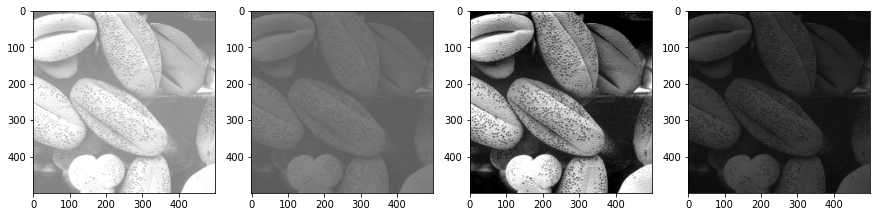

In [ ]:
img1 = cv2.imread("/content/image1.tif")
img2 = cv2.imread("/content/image2.tif")
img3 = cv2.imread("/content/image3.tif")
img4 = cv2.imread("/content/image4.png")
fig,axis = plt.subplots(1,4,figsize = (15,10))
axis[0].imshow(img1,cmap = "gray")
axis[1].imshow(img2,cmap = "gray")
axis[2].imshow(img3,cmap = "gray")
axis[3].imshow(img4,cmap = "gray")

In [ ]:
def make_histogram(img):
  if len(img.shape) == 3:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  d = dict(zip(np.arange(0,255),[0 for x in range(0,255)]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      pixel = img[i][j]
      if pixel not in d:
        d[pixel] = 1
      else:
        d[pixel] += 1
  plt.stem(d.keys(),d.values())
  return (list(d.keys()),list(d.values()))

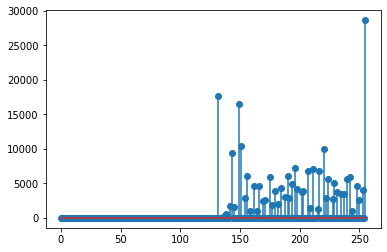

In [ ]:
a,k = make_histogram(img1)

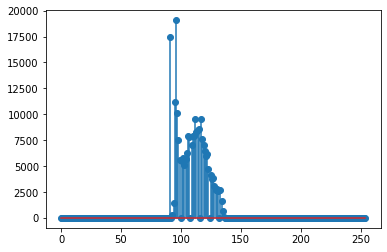

In [ ]:
a,k = make_histogram(img2)

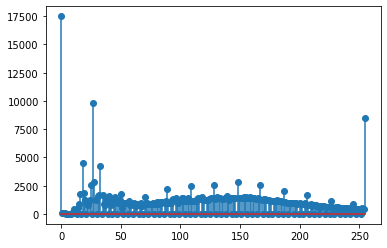

In [ ]:
a,k = make_histogram(img3)

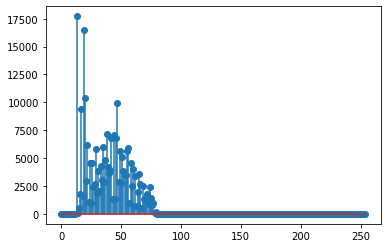

In [ ]:
a,k = make_histogram(img4)

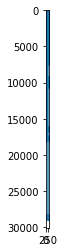

In [ ]:
img1 = cv2.imread("image1.tif")
plt.imshow(img1,cmap = "gray")
a,k = make_histogram(img1)

In [ ]:
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
[m,n] = img1.shape
print(m,n)

500 500


In [ ]:
import pandas as pd
data = pd.DataFrame({"Intensity of pixel":a,"Frequency":k})
data.head()

,Intensity of pixel,Frequency
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
k = np.array(k)
pdf = k/(m*n) #Probability distribution of each function
data["pdf"] = pdf

In [ ]:
cdf = [pdf[0]]
for i in range(1,len(pdf)):
  val = cdf[i-1]+pdf[i]
  cdf.append(val)
cdf = np.array(cdf)
data["cdf"] = cdf

In [ ]:
sk = cdf*255
sk = np.array(sk,dtype = np.int)
data["sk"] = sk
data

,Intensity of pixel,Frequency,pdf,cdf,sk
0,0,0,0.000000,0.000000,0
1,1,0,0.000000,0.000000,0
2,2,0,0.000000,0.000000,0
3,3,0,0.000000,0.000000,0
4,4,0,0.000000,0.000000,0
...,...,...,...,...,...
251,251,0,0.000000,0.869336,221
252,252,0,0.000000,0.869336,221
253,253,4007,0.016028,0.885364,225
254,254,0,0.000000,0.885364,225


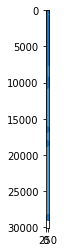

In [ ]:
equi_image = np.zeros((m,n),dtype = np.int)
for row in range(m):
  for col in range(n):
    og_val = img1[row][col]
    equi_image[row][col] = sk[og_val]

plt.imshow(equi_image,cmap = "gray")
a_new,k_new = make_histogram(equi_image)

Text(0, 0.5, 'New Intensity')

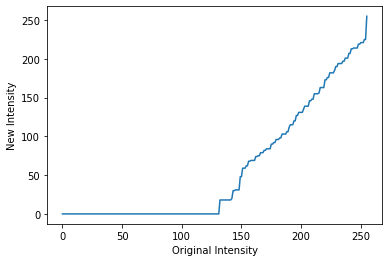

In [ ]:
plt.plot(a,sk)
plt.xlabel("Original Intensity")
plt.ylabel("New Intensity")